# Load in the Model

In [18]:
from transformers import AutoImageProcessor

checkpoint = "nvidia/mit-b1"
image_processor = AutoImageProcessor.from_pretrained(checkpoint, reduce_labels=False ,num_labels=2)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
C:\Users\longw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\transformers\models\segformer\image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [19]:
import json

id2label = {0: 'nothing', 1: 'fluid'}


with open('id2label.json', 'w') as fp:
    json.dump(id2label, fp)

label2id = {v: k for k, v in id2label.items()}
num_labels = len(id2label)
print(num_labels)

2


In [20]:
from transformers import AutoModelForSemanticSegmentation
path = "jack\jack\\fold3\checkpoint-7000"
model = AutoModelForSemanticSegmentation.from_pretrained(path, id2label=id2label, label2id=label2id) #19 best curr

# Load in the image(s)

(350, 515, 3)


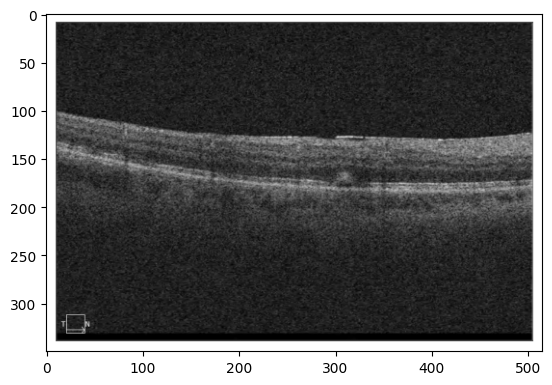

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
image_path = "output.png"
image = Image.open(image_path)

# Convert RGBA to RGB if an alpha channel is present
if image.mode == "RGBA":
    image = image.convert("RGB")

# Now this image has only 3 channels (R, G, B)
array = np.array(image)
print(array.shape)  # Should show (height, width, 3) if RGB

plt.imshow(array, cmap='gray')

In [22]:
inputs = image_processor(images=image, return_tensors="pt")

# Run the images through the model

In [23]:
import torch
from torch import nn
encoding = image_processor(image, return_tensors="pt")
pixel_values = encoding.pixel_values
outputs = model(pixel_values=pixel_values)
logits = outputs.logits

In [24]:
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],
    mode="bilinear",
    align_corners=False,
)

pred_seg = upsampled_logits.argmax(dim=1)[0]
pred_seg
print(np.unique(pred_seg, return_counts=True))


(array([0, 1], dtype=int64), array([180165,     85], dtype=int64))


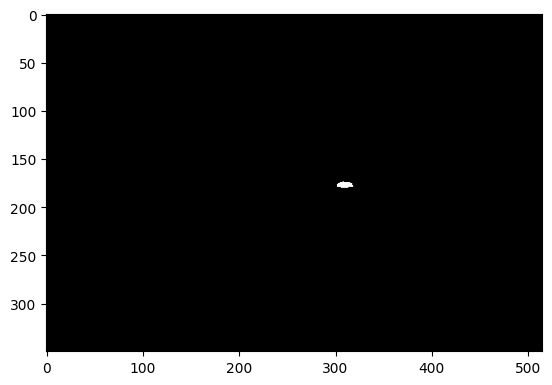

In [25]:
import matplotlib.pyplot as plt
np.shape(pred_seg)
plt.imshow(pred_seg, cmap='gray')